<a href="https://colab.research.google.com/github/cJagno/Sales-Predictions/blob/main/Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Cleaning

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/PT_Data_Science/PandasForDataManipulation/sales_predictions.csv')

In [ ]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#sales['Item_Identifier'].value_counts()

In [ ]:
#sales['Item_Identifier']


In [ ]:
sales.shape

(8523, 12)

In [ ]:
out_ident = sales['Outlet_Identifier']== 'OUT045'
out_ident2 = sales['Outlet_Identifier']== 'OUT010'
out_loc3 = sales['Outlet_Location_Type']== 'Tier 3'
out_loc2 = sales['Outlet_Location_Type']== 'Tier 2'
out_loc1 = sales['Outlet_Location_Type']== 'Tier 1'
out_type1 = sales['Outlet_Type']== 'Supermarket Type1'
out_type2 = sales['Outlet_Type']== 'Supermarket Type2'
out_type3 = sales['Outlet_Type']== 'Supermarket Type3'
out_type4 = sales['Outlet_Type']== 'Grocery Store'


In [ ]:
#Supermarket Type2 and Type3 = medium Grocery Store = small
sales[out_type1].value_counts('Outlet_Size')

Outlet_Size
Small     1860
High       932
Medium     930
dtype: int64

In [ ]:
sales[out_loc3].value_counts('Outlet_Size')

Outlet_Size
Medium    1863
High       932
dtype: int64

In [ ]:
sales[out_ident].shape

(929, 12)

In [ ]:
sales[out_ident].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972
56,NCX54,9.195,Low Fat,0.048157,Household,106.1622,OUT045,2002,NaN,Tier 2,Supermarket Type1,2117.2440


In [ ]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
sales.loc[sales['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
sales.loc[sales['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
sales.loc[sales['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'

In [ ]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
size_mis = sales['Outlet_Size'].isna()
outtypedf = sales.loc[size_mis,:]
outtypedf['Outlet_Type'].value_counts()
type_grocery = sales['Outlet_Type']== 'Grocery Store'
type_superT1 = sales['Outlet_Type']== 'Supermarket Type1'

In [ ]:
#type1filt = sales['Outlet_Type']== 'Supermarket Type1'
sales.fillna(sales.mean(),inplace=True)
#sales.loc[out2df,:].fillna('High', inplace=True) 
#grocerytypedf = outtypedf.loc[outtypeGdf, :]
#grocerytypedf.loc[0:, 'Outlet_Size'].fillna('Small', inplace=True)
#supertype1df = outtypedf.loc[outtypeT1df,:]
#supertype1df.loc[0:, 'Outlet_Size'].fillna('High', inplace=True)
#sales.loc[type_grocery & size_mis].fillna('Small', inplace=True)
#sales.loc[size_mis & type_superT1].fillna('High', inplace=True)
sales.loc[0:, 'Outlet_Size'].fillna('High', inplace=True)

In [ ]:
#Supermarket type1= mixed Type2 and Type3 = medium Grocery Store = small
sales['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDG09     9
FDF52     9
FDD38     9
         ..
FDK57     1
FDC23     1
FDY43     1
FDN52     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
size = sales['Outlet_Size'].values
item = sales['Item_Identifier'].values
item_sale =  sales['Item_Outlet_Sales'].values
sns.set_theme(style="darkgrid")


In [ ]:
sales['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
item1 = sales['Item_Identifier']== 'FDG33'
item1_type1df = sales.loc[item1 & out_type1]
item1_type2df = sales.loc[item1 & out_type2]
item1_type3df = sales.loc[item1 & out_type3]
item1_type4df = sales.loc[item1 & out_type4]
item1_pricetype1 = item1_type1df['Item_Outlet_Sales'].values.sum()
item1_pricetype2 = item1_type2df['Item_Outlet_Sales'].values.sum()
item1_pricetype3 = item1_type3df['Item_Outlet_Sales'].values.sum()
item1_pricetype4 = item1_type4df['Item_Outlet_Sales'].values.sum()
item2 = sales['Item_Identifier']== 'NCI54'
item2_type1df = sales.loc[item2 & out_type1]
item2_type2df = sales.loc[item2 & out_type2]
item2_type3df = sales.loc[item2 & out_type3]
item2_type4df = sales.loc[item2 & out_type4]
item2_pricetype1 = item2_type1df['Item_Outlet_Sales'].values.sum()
item2_pricetype2 = item2_type2df['Item_Outlet_Sales'].values.sum()
item2_pricetype3 = item2_type3df['Item_Outlet_Sales'].values.sum()
item2_pricetype4 = item2_type4df['Item_Outlet_Sales'].values.sum()
item3 = sales['Item_Identifier']== 'FDF52'
item3_type1df = sales.loc[item3 & out_type1]
item3_type2df = sales.loc[item3 & out_type2]
item3_type3df = sales.loc[item3 & out_type3]
item3_type4df = sales.loc[item3 & out_type4]
item3_pricetype1 = item3_type1df['Item_Outlet_Sales'].values.sum()
item3_pricetype2 = item3_type2df['Item_Outlet_Sales'].values.sum()
item3_pricetype3 = item3_type3df['Item_Outlet_Sales'].values.sum()
item3_pricetype4 = item3_type4df['Item_Outlet_Sales'].values.sum()
item3_type4df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6002,FDF52,9.300000,Low Fat,0.111782,Frozen Foods,182.3292,OUT010,1998,High,Tier 3,Grocery Store,182.4292
8030,FDF52,12.857645,Low Fat,0.116929,Frozen Foods,183.3292,OUT019,1985,Small,Tier 1,Grocery Store,364.8584


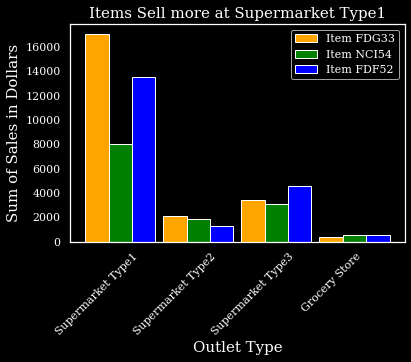

In [ ]:
#x = type, y = sales
x_bar = ['Supermarket Type1','Supermarket Type2', 'Supermarket Type3', 'Grocery Store']
y_bar1 = [item1_pricetype1, item1_pricetype2, item1_pricetype3, item1_pricetype4]
y_bar2 = [item2_pricetype1, item2_pricetype2, item2_pricetype3, item2_pricetype4]
y_bar3 = [item3_pricetype1, item3_pricetype2, item3_pricetype3, item3_pricetype4]
positions = [0, 1, 2, 3]
positions2 = [.3, 1.3, 2.3, 3.3]
positions3 = [.6, 1.6, 2.6, 3.6]
plt.rcParams['font.family'] = 'serif'
plt.style.use('dark_background')
plt.bar(positions, y_bar1, width= .3, color= 'Orange', label = 'Item FDG33')
plt.bar(positions2, y_bar2, width= .3, color= 'Green', label = 'Item NCI54')
plt.bar(positions3, y_bar3, width= .3, color= 'Blue', label = 'Item FDF52')
plt.xticks(positions, x_bar, rotation = 45)
plt.title('Items Sell more at Supermarket Type1',fontsize= 15)
plt.ylabel('Sum of Sales in Dollars',fontsize= 15)
plt.xlabel('Outlet Type',fontsize= 15)
plt.grid(False)
plt.legend()
plt.savefig('SupermarketType1.png', dpi = 300)

In [ ]:
sales['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
grocery_filter = sales['Outlet_Type']=='Grocery Store'
supermarkettype1_filter = sales['Outlet_Type']=='Supermarket Type1'
supermarkettype2_filter = sales['Outlet_Type']=='Supermarket Type2'
supermarkettype3_filter = sales['Outlet_Type']=='Supermarket Type3'
year2009_filter = sales['Outlet_Establishment_Year']==2009
year1999_filter = sales['Outlet_Establishment_Year']==1999
year1998_filter = sales['Outlet_Establishment_Year']==1998
year1997_filter = sales['Outlet_Establishment_Year']==1997
year1985_filter = sales['Outlet_Establishment_Year']==1985
year1987_filter = sales['Outlet_Establishment_Year']==1987
year2004_filter = sales['Outlet_Establishment_Year']==2004
year2002_filter = sales['Outlet_Establishment_Year']==2002
year2007_filter = sales['Outlet_Establishment_Year']==2007
grocerydf = sales.loc[grocery_filter,:]
supermarkettype1df2007 = sales[supermarkettype1_filter & year2007_filter]
supermarkettype1df1987 = sales[supermarkettype1_filter & year1987_filter]
supermarkettype1df1999 = sales[supermarkettype1_filter & year1999_filter]
supermarkettype1df2004 = sales[supermarkettype1_filter & year2004_filter]
supermarkettype1df2002 = sales[supermarkettype1_filter & year2002_filter]
supermarkettype1df1997 = sales[supermarkettype1_filter & year1997_filter]
supermarkettype1df = sales.loc[supermarkettype1_filter,:]
supermarkettype2df2009 = sales[supermarkettype2_filter & year2009_filter]
supermarkettype2df = sales.loc[supermarkettype2_filter,:]
supermarkettype3df1985 = sales[supermarkettype3_filter & year1985_filter]
supermarkettype3df = sales.loc[supermarkettype3_filter,:]
#supermarkettype1df['Outlet_Establishment_Year'].value_counts()
#1987 1999 1997 2004 2002 2007
supermarkettype1sales1987 = supermarkettype1df1987['Item_Outlet_Sales'].values.sum()
supermarkettype1sales1999 = supermarkettype1df1999['Item_Outlet_Sales'].values.sum()
supermarkettype1sales2007 = supermarkettype1df2007['Item_Outlet_Sales'].values.sum()
supermarkettype1sales2004 = supermarkettype1df2004['Item_Outlet_Sales'].values.sum()
supermarkettype1sales2002 = supermarkettype1df2002['Item_Outlet_Sales'].values.sum()
supermarkettype1sales1997 = supermarkettype1df1997['Item_Outlet_Sales'].values.sum()
supermarkettype2sales2009 = supermarkettype2df2009['Item_Outlet_Sales'].values.sum()
supermarkettype3sales1985 = supermarkettype3df1985['Item_Outlet_Sales'].values.sum()
grocerydf['Outlet_Establishment_Year'].value_counts()


1998    555
1985    528
Name: Outlet_Establishment_Year, dtype: int64

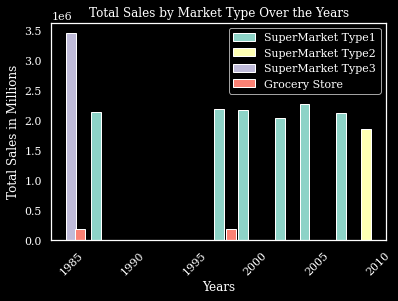

In [ ]:
# OUT010, OUT019 only grocery stores type3 85, type2 09, type1 87,97,99,04,02,07, grocery 98, 85
grocerydf1998 = grocerydf.loc[year1998_filter,:]
grocerydf1985 = grocerydf.loc[year1985_filter,:]
grocery1985sales = grocerydf1985['Item_Outlet_Sales'].values.sum()
grocery1998sales = grocerydf1998['Item_Outlet_Sales'].values.sum()
#out019_filter = sales['Outlet_Identifier']=='OUT019'
#out019df = sales.loc[out019_filter,:]
#out019df['Outlet_Establishment_Year'].value_counts()
x1 = [1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009]
#yo= [  0   , 1   , 2  ,  3  ,  4  ,  5  ,  6  ,  7  ,  8]
#positions = [1, 2, 4, 5, 6, 7]
#positions2 = [8]
#positions3 = [0]
#positions4 = [.3,3]
positions = [1987, 1997, 1999, 2002, 2004, 2007]
positions2 = [2009]
positions3 = [1985]
positions4 = [1985.7,1998]
y1 = [supermarkettype1sales1987, supermarkettype1sales1999, supermarkettype1sales2007, supermarkettype1sales2002,
      supermarkettype1sales2004, supermarkettype1sales1997]
y2 = [supermarkettype2sales2009]
y3 = [supermarkettype3sales1985]
y4 = [grocery1985sales, grocery1998sales]
plt.bar(positions, y1, label = 'SuperMarket Type1')
plt.bar(positions2, y2, label = 'SuperMarket Type2')
plt.bar(positions3, y3, label = 'SuperMarket Type3')
plt.bar(positions4, y4,label = 'Grocery Store')
plt.xticks( rotation=45)
plt.ylabel('Total Sales in Millions')
plt.xlabel("Years")
plt.title('Total Sales by Market Type Over the Years')
plt.legend()
plt.grid(False)

In [ ]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Supermarket Type1 Item Sales in Established Year vs Latest Year')

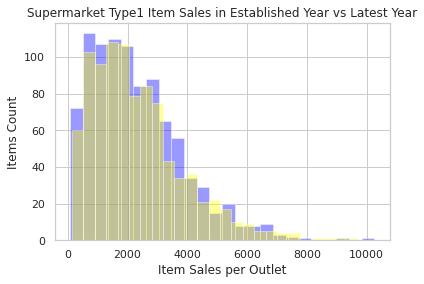

In [ ]:
sns.distplot(supermarkettype1df1987['Item_Outlet_Sales'], kde=False, label= 'Supermarket Type1 1987', color='blue')
sns.distplot(supermarkettype1df2007['Item_Outlet_Sales'], kde=False, label= 'Supermarket Type1 2007', color='yellow')

sns.choose_light_palette
plt.xlabel('Item Sales per Outlet')
plt.ylabel("Items Count")
plt.title('Supermarket Type1 Item Sales in Established Year vs Latest Year')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Supermarket Type2 Item Sales in Established Year')

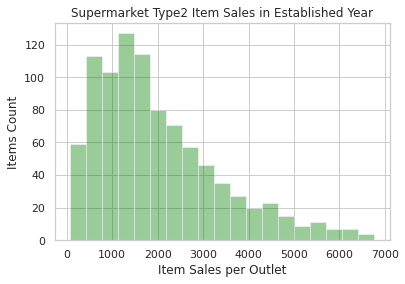

In [ ]:
sns.distplot(supermarkettype2df2009['Item_Outlet_Sales'], kde=False, label= 'Supermarket Type2 Item Sales', color='green')
plt.xlabel('Item Sales per Outlet')
plt.ylabel("Items Count")
plt.title('Supermarket Type2 Item Sales in Established Year')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Supermarket Type3 Item Sales in Established')

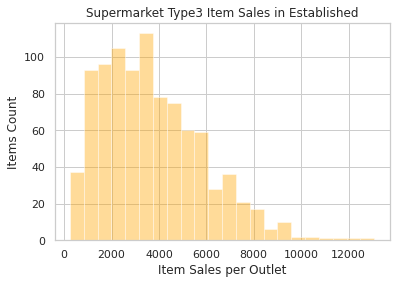

In [ ]:
sns.distplot(supermarkettype3df1985['Item_Outlet_Sales'], kde=False, label= 'Supermarket Type3 1985', color='orange')
plt.xlabel('Item Sales per Outlet')
plt.ylabel("Items Count")
plt.title('Supermarket Type3 Item Sales in Established')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Grocery Market Item Sales in Established Year vs Latest Year')

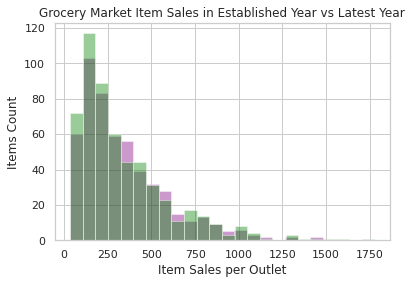

In [ ]:
sns.distplot(grocerydf1985['Item_Outlet_Sales'], kde=False, label= 'Grocery Market 1985', color='purple')
sns.distplot(grocerydf1998['Item_Outlet_Sales'], kde=False, label= 'Grocery Market 1998', color='green')
plt.xlabel('Item Sales per Outlet')
plt.ylabel("Items Count")
plt.title('Grocery Market Item Sales in Established Year vs Latest Year')